In [1]:
# from update_data import *
from static import *
from stock_data import *
from scipy.stats.mstats import winsorize
from bao import *  # type: ignore
from AR import *
from MA import *

# from scipy.stats.mstats import winsorize
stock = StockData("./data/stock/", "./stock_dictionary.json")
stock_data, market = stock.get_data()

## winsorize the outliner

In [6]:
market_winsored = pd.DataFrame()
for i in market["exchange"].unique():
    temp = market.loc[market["exchange"] == i]
    temp["return_weighted"] = winsorize(temp["return_weighted"], limits=[0.05, 0.05])
    temp["log_return_weighted"] = winsorize(temp["log_return_weighted"], limits=[0.05, 0.05])
    market_winsored = pd.concat([market_winsored, temp], axis=0)
    # Detect outliers using Z-score

# test stationary

In [7]:
from test_and_visualize import *

In [8]:
for i in market_winsored["exchange"].unique():
    if i not in ["BOND", "DELISTED"]:
        temp = market_winsored[market_winsored["exchange"] == i]["return_weighted"]
        print(i, flush=True)
        print("adf_test result:", flush=True)
        adf_test(temp, 0.01)
        print("kpss_test result:", flush=True)
        kpss_test(temp, 0.01)

HNX
adf_test result:


ic| adf_statistic: np.float64(-9.727638314164077)
    p_value: np.float64(9.18311395864528e-17)
    critical_values: {'1%': np.float64(-3.4325477654888106),
                      '10%': np.float64(-2.5672869050538965),
                      '5%': np.float64(-2.862511029642188)}


Judgment: The series is likely stationary (Reject null hypothesis).


kpss_test result:


The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

ic| kpss_statistic: np.float64(0.1880799201782248)
    p_value: np.float64(0.1)
    critical_values: {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463}


Judgment: The series is likely stationary (Fail to reject null hypothesis).


HSX
adf_test result:


ic| adf_statistic: np.float64(-13.861837627539671)
    p_value: np.float64(6.70708001749873e-26)
    critical_values: {'1%': np.float64(-3.432542607157588),
                      '10%': np.float64(-2.5672856921402096),
                      '5%': np.float64(-2.8625087513967085)}


Judgment: The series is likely stationary (Reject null hypothesis).


kpss_test result:


The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

ic| kpss_statistic: np.float64(0.06691774482395141)
    p_value: np.float64(0.1)
    critical_values: {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463}


Judgment: The series is likely stationary (Fail to reject null hypothesis).


UPCOM
adf_test result:


ic| adf_statistic: np.float64(-11.541433617242584)
    p_value: np.float64(3.626494115323865e-21)
    critical_values: {'1%': np.float64(-3.4325448149029985),
                      '10%': np.float64(-2.5672862112626573),
                      '5%': np.float64(-2.8625097264772665)}


Judgment: The series is likely stationary (Reject null hypothesis).


kpss_test result:


The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

ic| kpss_statistic: np.float64(0.26302896629174594)
    p_value: np.float64(0.1)
    critical_values: {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463}


Judgment: The series is likely stationary (Fail to reject null hypothesis).


vn30
adf_test result:


ic| adf_statistic: np.float64(-26.291504800110992)
    p_value: 0.0
    critical_values: {'1%': np.float64(-3.434472023496696),
                      '10%': np.float64(-2.5677392685830567),
                      '5%': np.float64(-2.8633606295952383)}


Judgment: The series is likely stationary (Reject null hypothesis).


kpss_test result:


The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

ic| kpss_statistic: np.float64(0.2019034651066285)
    p_value: np.float64(0.1)
    critical_values: {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463}


Judgment: The series is likely stationary (Fail to reject null hypothesis).


vni
adf_test result:


ic| adf_statistic: np.float64(-27.94671956583729)
    p_value: 0.0
    critical_values: {'1%': np.float64(-3.432737101522179),
                      '10%': np.float64(-2.567331423936805),
                      '5%': np.float64(-2.8625946496914145)}


Judgment: The series is likely stationary (Reject null hypothesis).


kpss_test result:


The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

ic| kpss_statistic: np.float64(0.06854998727747261)
    p_value: np.float64(0.1)
    critical_values: {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463}


Judgment: The series is likely stationary (Fail to reject null hypothesis).




# Seasonarity

* with the cycle is 2 year: the trend is more observable

HNX


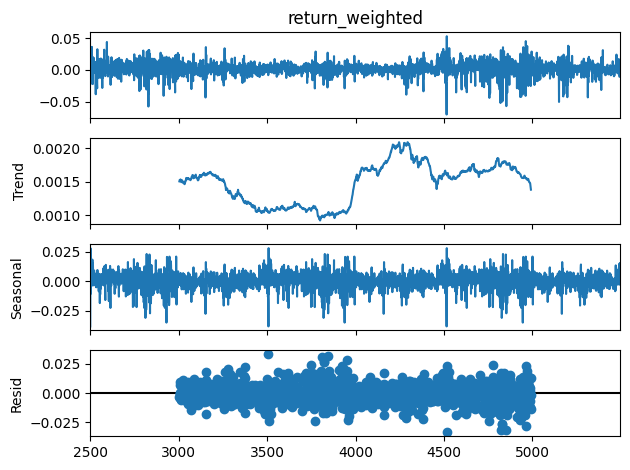

HSX


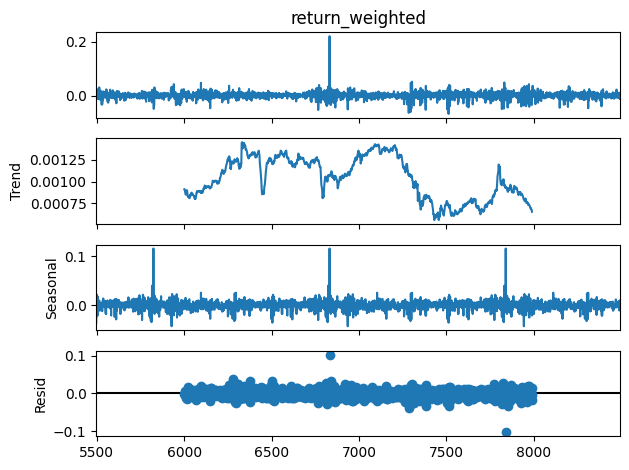

UPCOM


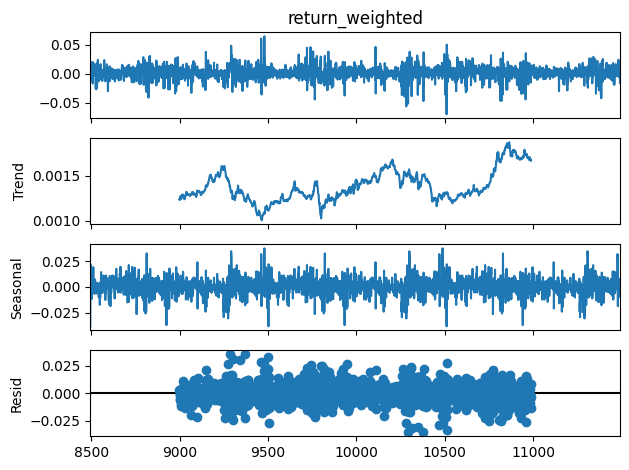

vn30
plot 1 year cycles


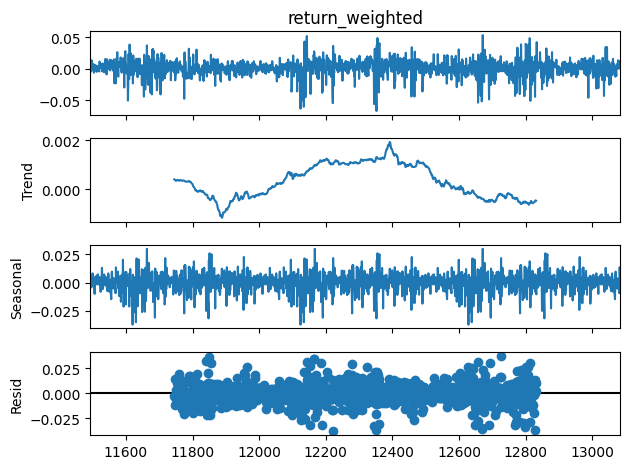

vni


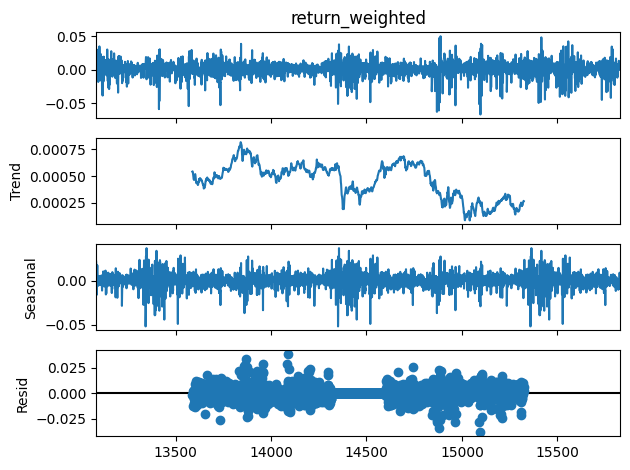

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

period = 2
for i in market["exchange"].unique():
    if i not in ["BOND", "DELISTED"]:
        print(i)
        try:
            temp = market[market["exchange"] == i]["return_weighted"]
            result = seasonal_decompose(temp, model="additive", period=period * 252 * 2)
            result.plot()
            plt.close()
        except (ValueError, TypeError):
            print("plot 1 year cycles")

            result = seasonal_decompose(temp, model="additive", period=period * 252)
            result.plot()
            plt.close()

* With 1 year cycle: the trend might not be so clear

ic| i: 'HNX'


'HNX'

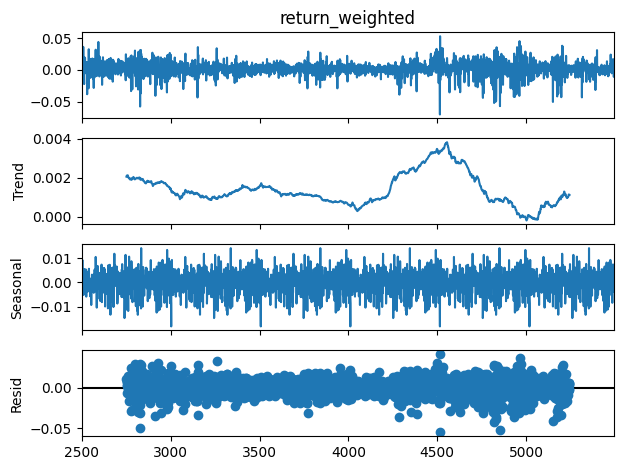

ic| i: 'HSX'


'HSX'

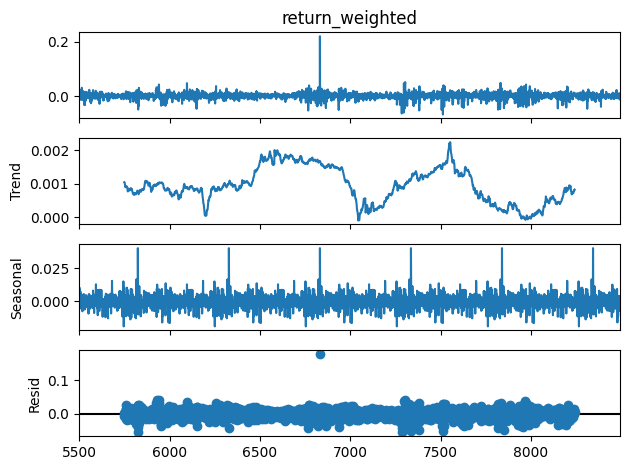

ic| i: 'UPCOM'


'UPCOM'

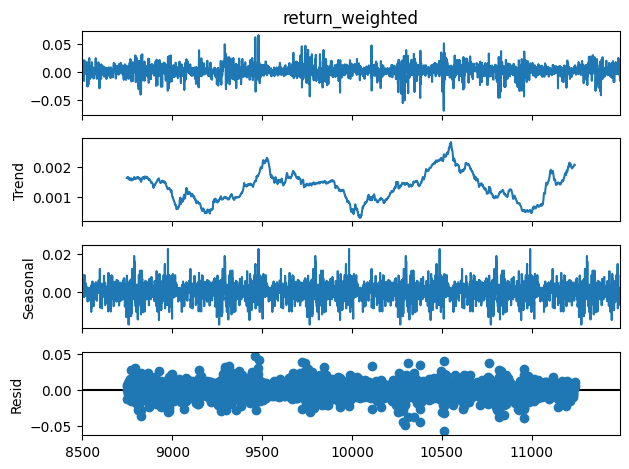

ic| i: 'vn30'


'vn30'

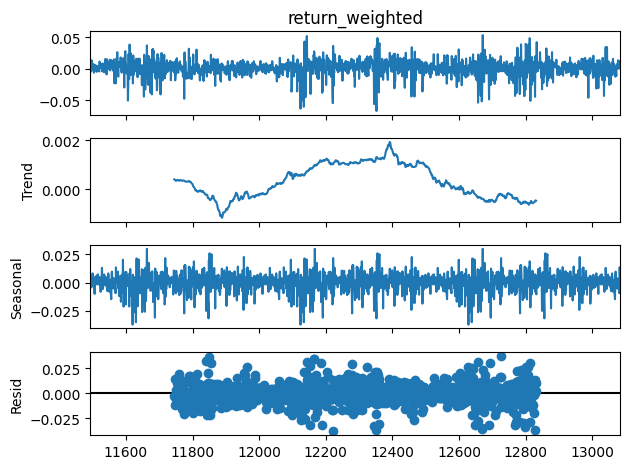

ic| i: 'vni'


'vni'

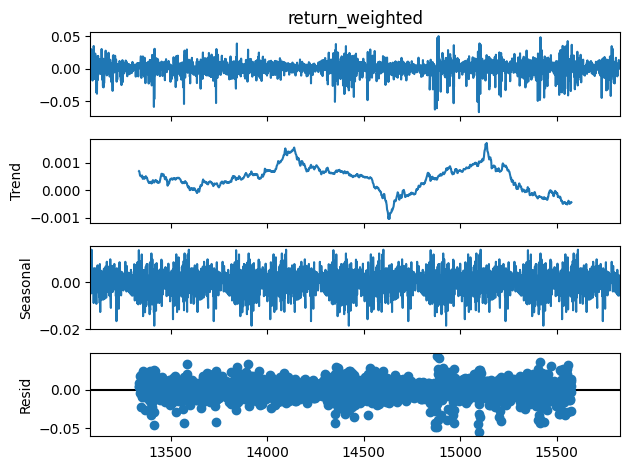

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

period = 1
for i in market["exchange"].unique():
    if i not in ["BOND", "DELISTED"]:
        ic(i)
        try:
            temp = market[market["exchange"] == i]["return_weighted"]
            result = seasonal_decompose(temp, model="additive", period=period * 252 * 2)
            result.plot()
            plt.close()
        except ValueError:
            print("plot 1 year cycles")
            result = seasonal_decompose(temp, model="additive", period=period * 252)
            result.plot()
            plt.close()

HSX


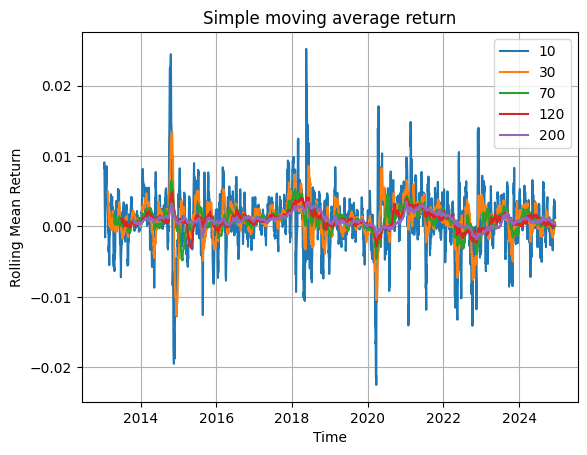

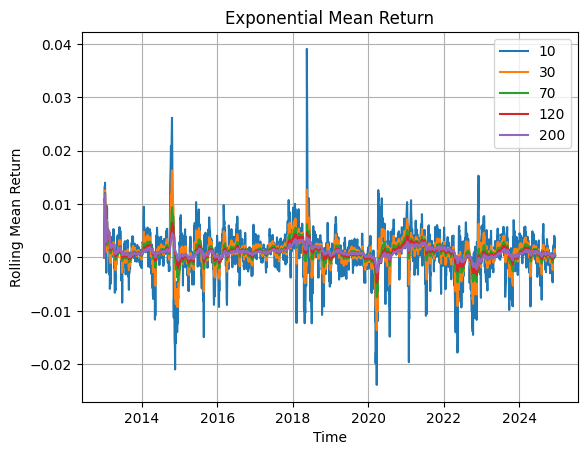

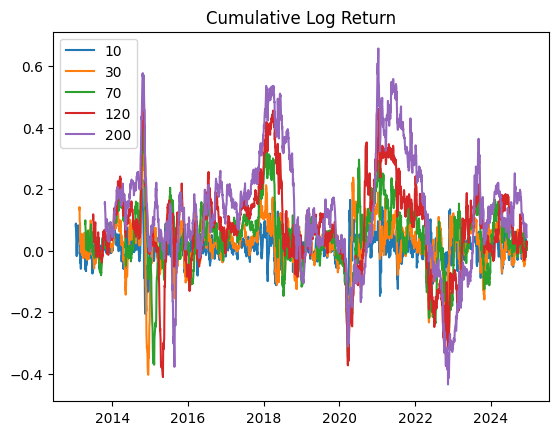

vn30


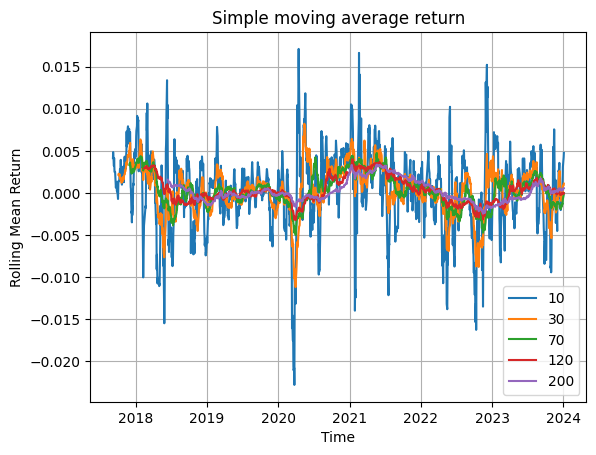

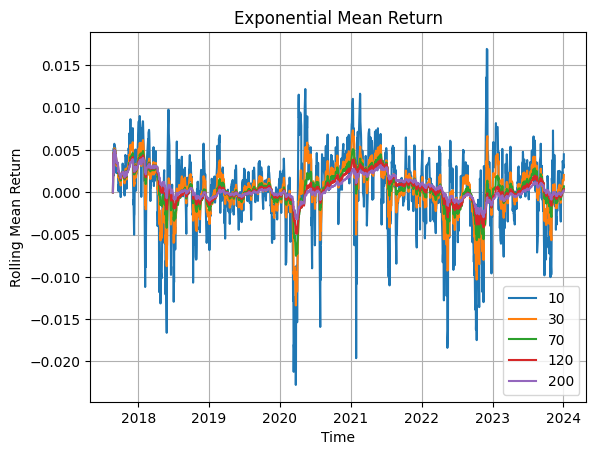

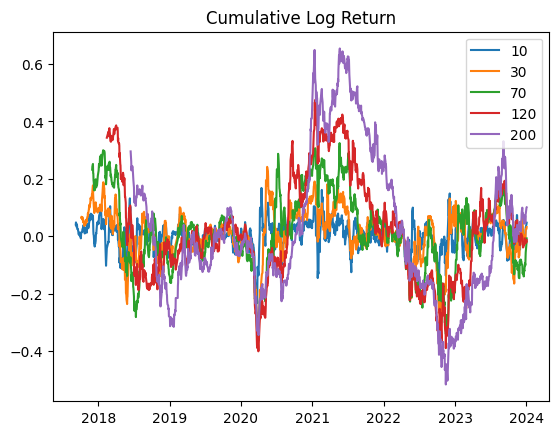

vni


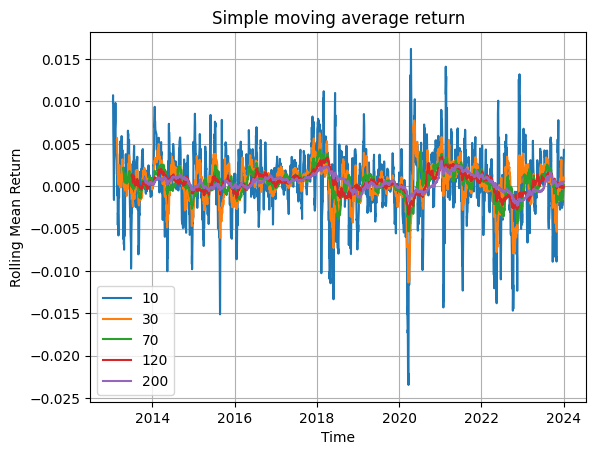

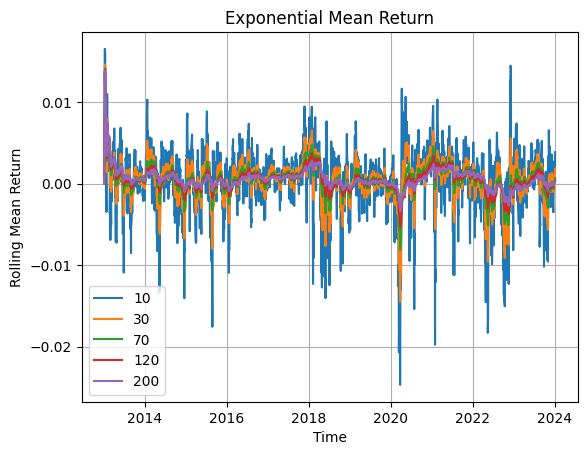

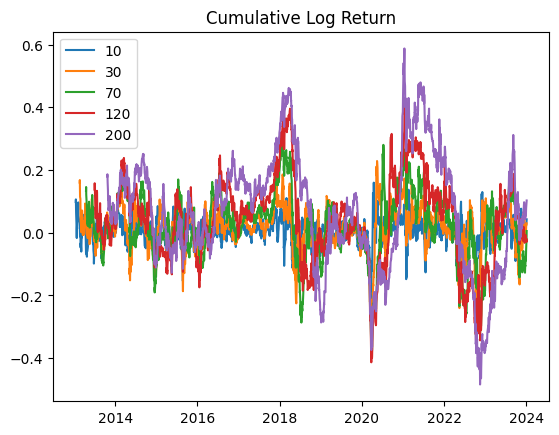

In [11]:
windows = [10, 30, 70, 120, 200]  # number of trading dates
for i in market["exchange"].unique():
    if i in ["HSX", "vni", "vn30"]:
        temp = market[market["exchange"] == i]
        print(i)
        simple_moving_average_visual(temp, "return_weighted", windows)
        exponential_moving_average_visual(
            temp, "return_weighted", windows
        )
        cumulative_visual(temp, "log_return_weighted", windows)

# Auto Regression

'HSX'

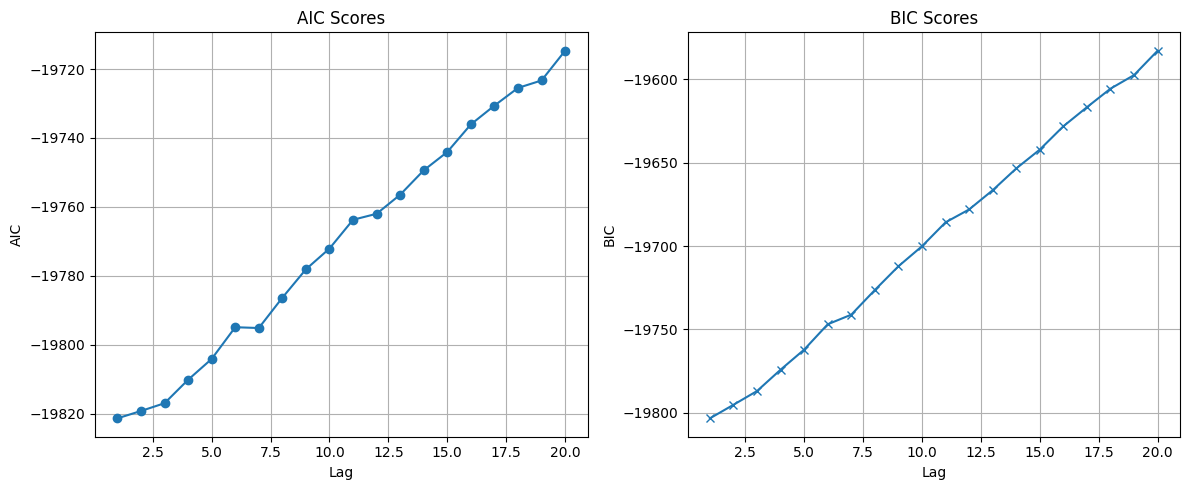

{'best_aic_lag': (1, np.float64(-19821.355514377425)),
 'best_bic_lag': (1, np.float64(-19803.35346002388))}

ic| min_mse_index:         mse  code
                   0  0.000084    13
    min_mape_index:        mape  code
                    0  4.807451     1


'vn30'

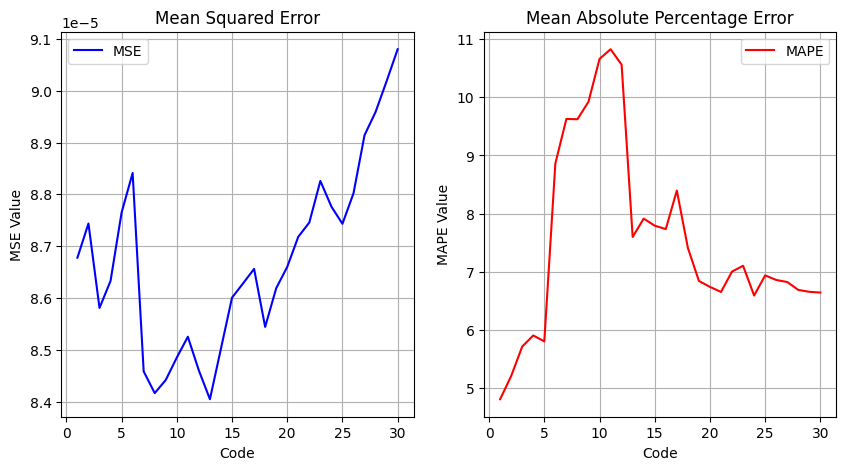

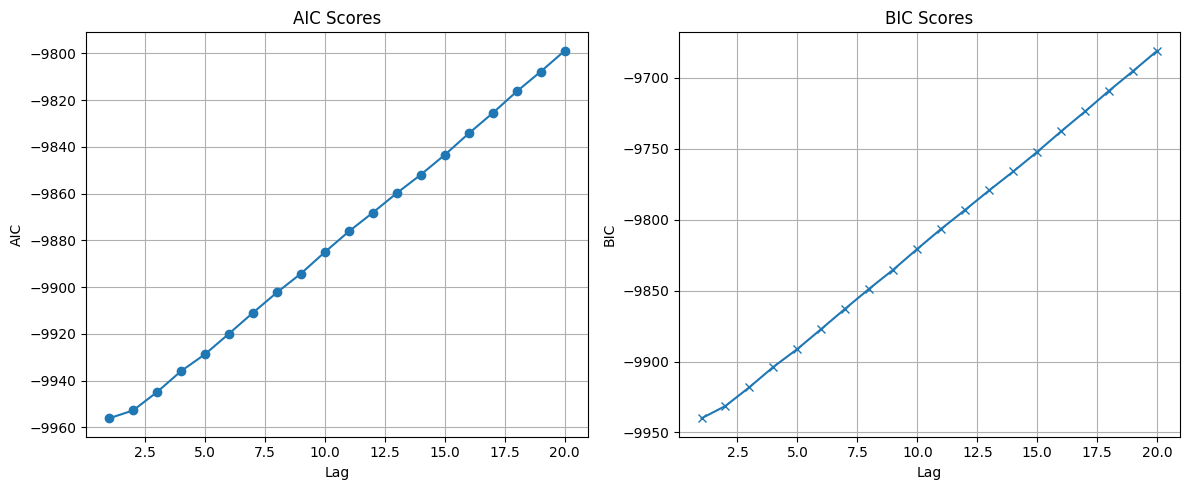

{'best_aic_lag': (1, np.float64(-9956.1739515939)),
 'best_bic_lag': (1, np.float64(-9940.059483708257))}

ic| min_mse_index:        mse  code
                   0  0.00007     3
    min_mape_index:        mape  code
                    0  1.161084     1


'vni'

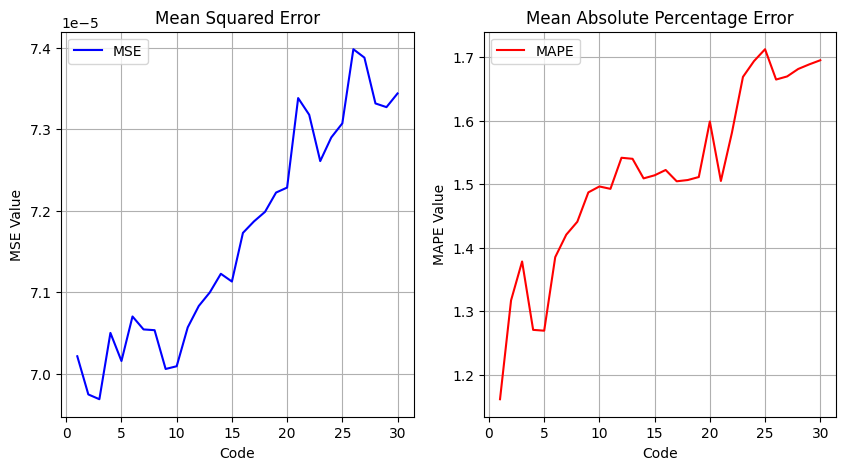

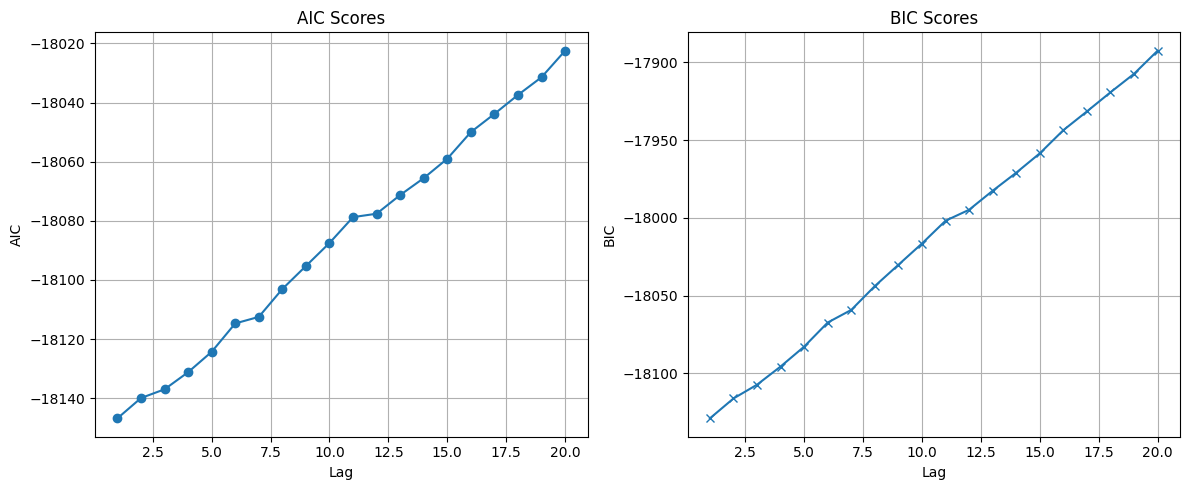

{'best_aic_lag': (1, np.float64(-18146.80481578683)),
 'best_bic_lag': (1, np.float64(-18129.05329982029))}

ic| min_mse_index:        mse  code
                   0  0.00008     7
    min_mape_index:        mape  code
                    0  1.142025     1


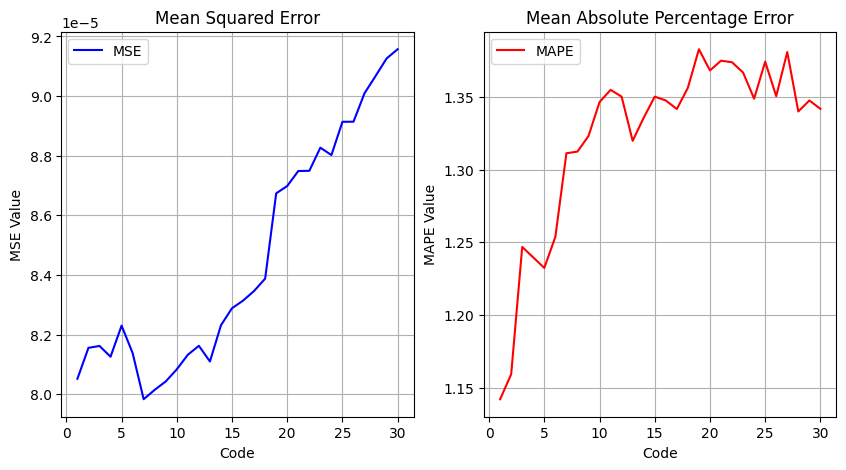

In [12]:
from AR import *

for i in market["exchange"].unique():
    if i in ["HSX", "vni", "vn30"]:
        i
        data = market_winsored[market_winsored["exchange"] == i]
        data.index = pd.date_range(
            start=data["time"].min(),
            periods=len(data),
            freq="B",
        )
        info_criteria_selection(data["return_weighted"])
        # using mean_squared_error
        result_return = plot_best_lag_model(data["return_weighted"])

'vni'

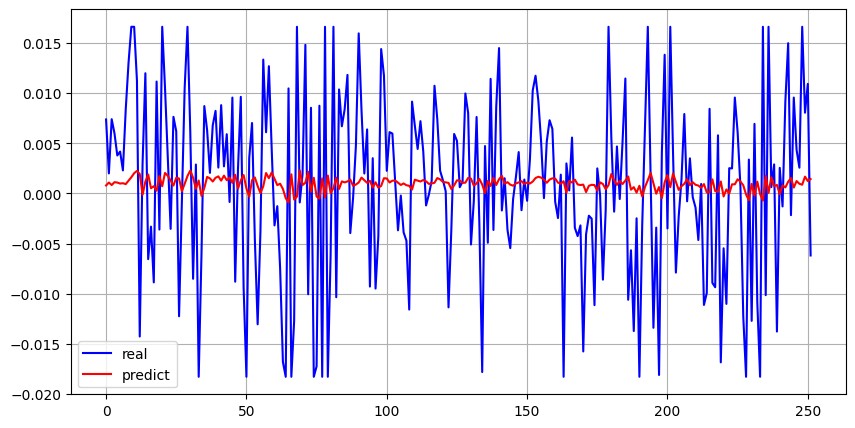

'HSX'

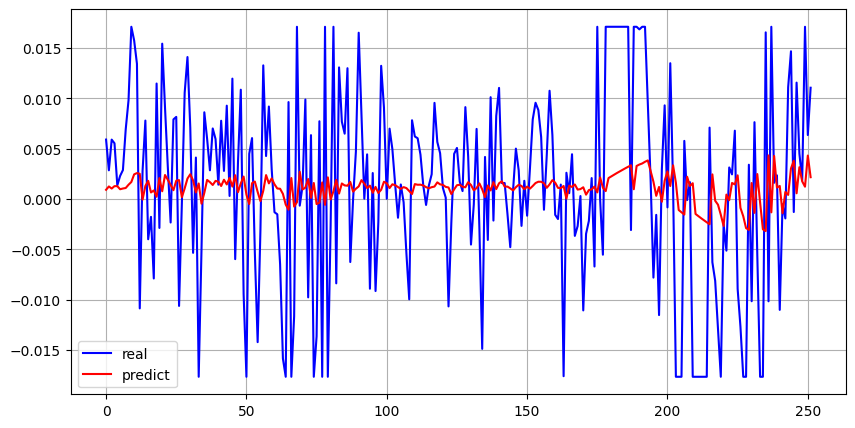

'vn30'

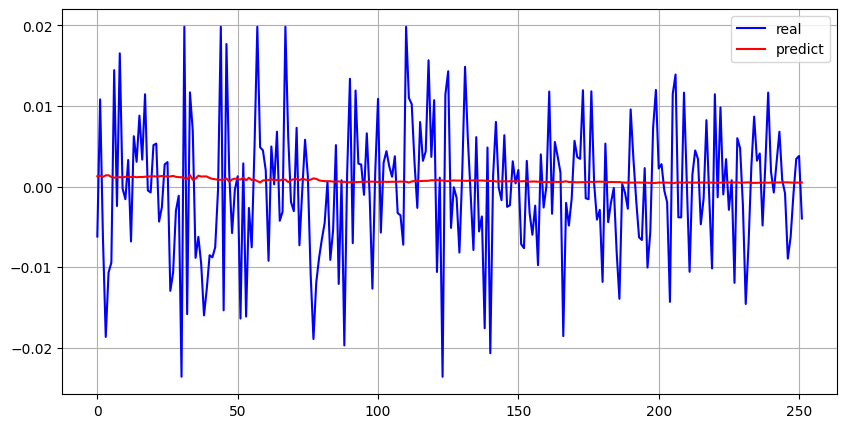

In [14]:
import numpy as np

for i in ["vni", "HSX", "vn30"]:
    i
    visualize(
        np.asarray(
            market_winsored[market_winsored["exchange"] == i][
                "return_weighted"
            ]
        ),
        1,
    )

## MA modeling

In [15]:
from MA import *

'HSX'

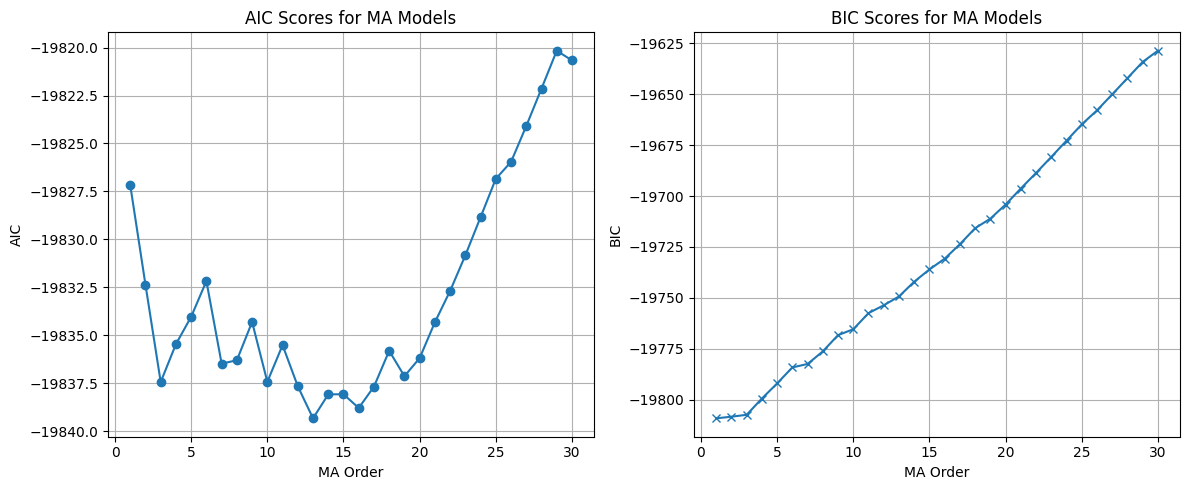

{'best_aic_order': (13, np.float64(-19839.331128991173)),
 'best_bic_order': (1, np.float64(-19809.166979971487))}

'vn30'

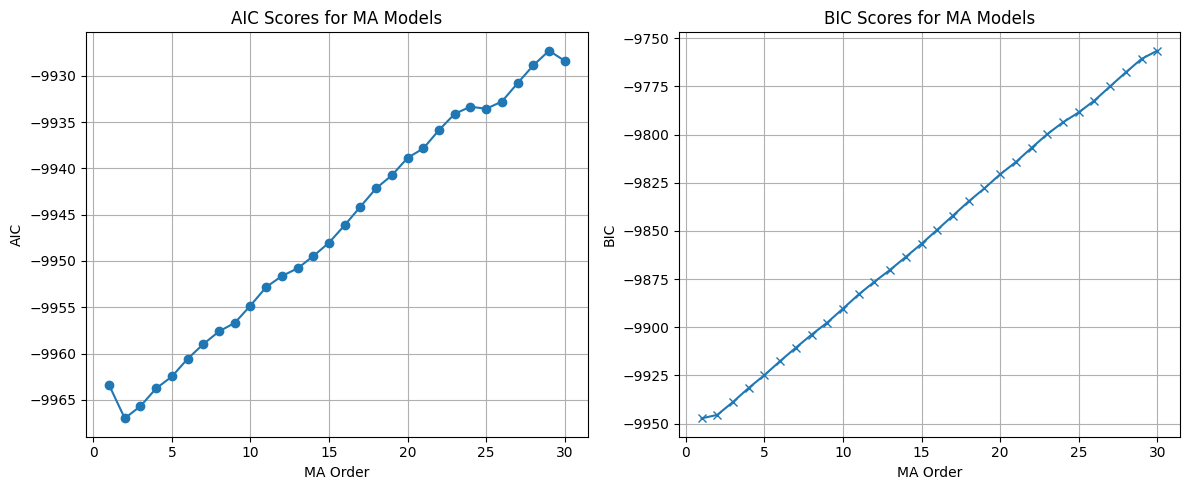

{'best_aic_order': (2, np.float64(-9966.988080029943)),
 'best_bic_order': (1, np.float64(-9947.275046023533))}

'vni'

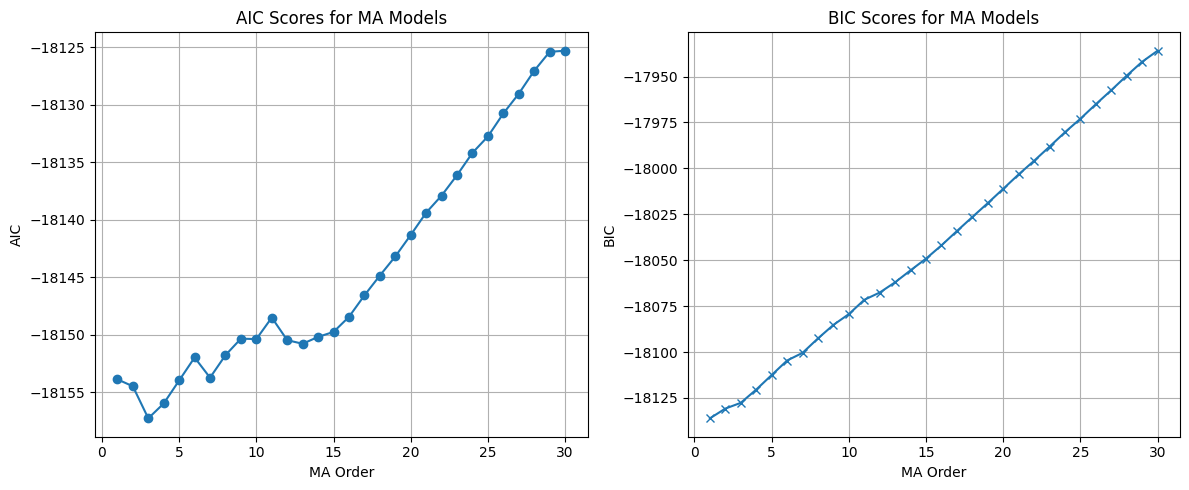

{'best_aic_order': (3, np.float64(-18157.251445046866)),
 'best_bic_order': (1, np.float64(-18136.109969493995))}

In [16]:
for i in market["exchange"].unique():
    if i in ["HSX", "vni", "vn30"]:
        i
        data = market_winsored[market_winsored["exchange"] == i]
        data.index = pd.date_range(
            start=data["time"].min(),
            periods=len(data),
            freq="B",
        )
        info_criteria_selection_ma(data["return_weighted"])

'HSX'

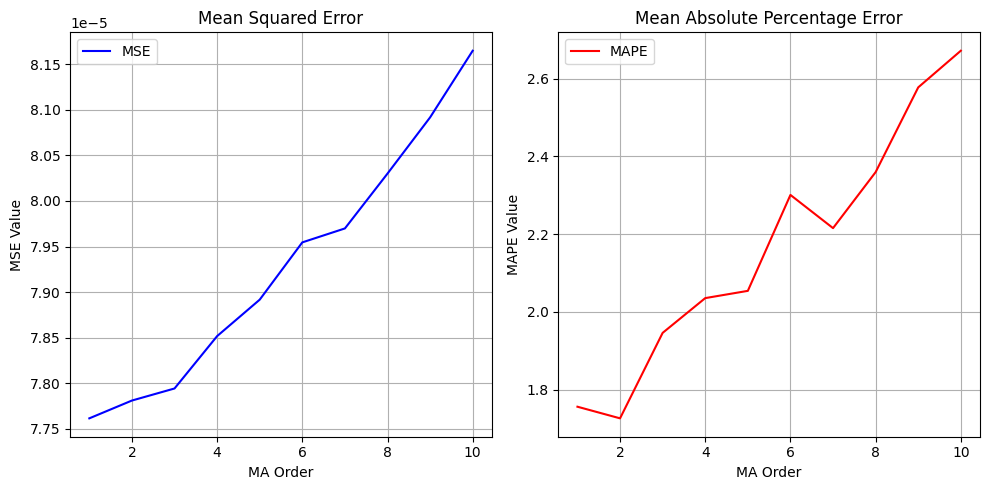

        mse  order
0  0.000078      1        mape  order
0  1.726371      2


mse      mape  order
0  0.000078  1.756257      1
0  0.000078  1.726371      2
0  0.000078  1.946123      3
0  0.000079  2.035493      4
0  0.000079  2.054148      5
0  0.000080  2.300769      6
0  0.000080  2.215421      7
0  0.000080  2.359434      8
0  0.000081  2.577327      9
0  0.000082  2.671557     10

'vn30'

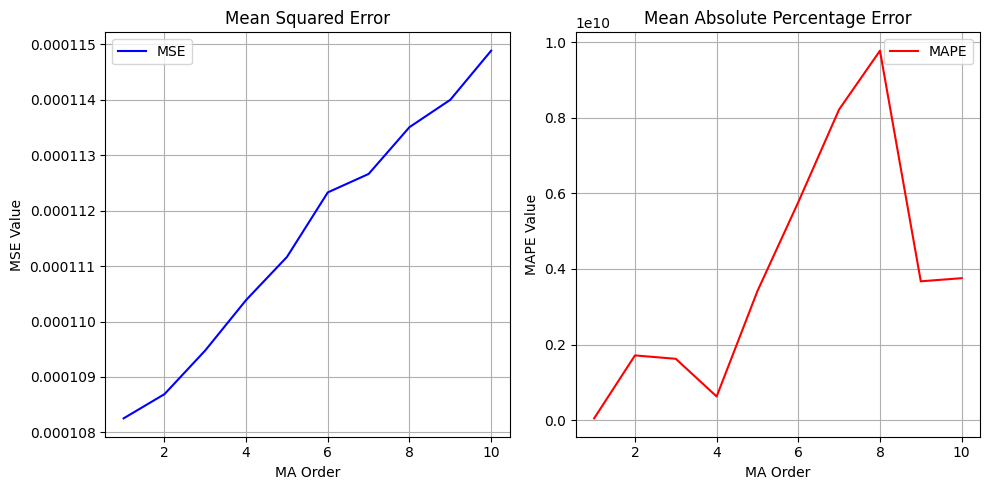

        mse  order
0  0.000108      1            mape  order
0  4.847213e+07      1


mse          mape  order
0  0.000108  4.847213e+07      1
0  0.000109  1.713035e+09      2
0  0.000109  1.623083e+09      3
0  0.000110  6.262330e+08      4
0  0.000111  3.416572e+09      5
0  0.000112  5.767540e+09      6
0  0.000113  8.219167e+09      7
0  0.000114  9.772823e+09      8
0  0.000114  3.673116e+09      9
0  0.000115  3.755808e+09     10

'vni'

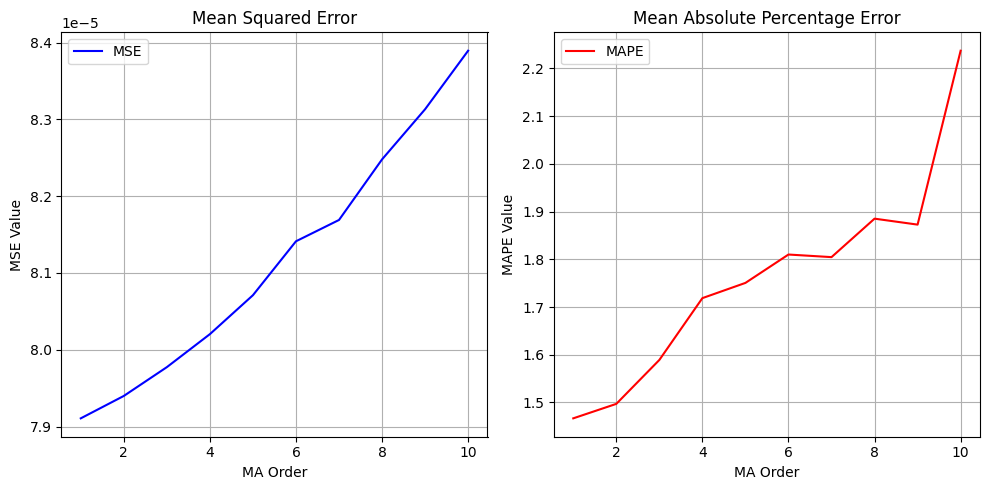

        mse  order
0  0.000079      1        mape  order
0  1.466652      1


mse      mape  order
0  0.000079  1.466652      1
0  0.000079  1.496985      2
0  0.000080  1.589060      3
0  0.000080  1.718630      4
0  0.000081  1.750545      5
0  0.000081  1.810016      6
0  0.000082  1.804588      7
0  0.000082  1.885203      8
0  0.000083  1.872709      9
0  0.000084  2.237238     10

In [17]:
for i in market["exchange"].unique():
    if i in ["HSX", "vni", "vn30"]:
        i
        data = market_winsored[market_winsored["exchange"] == i]
        data.index = pd.date_range(
            start=data["time"].min(),
            periods=len(data),
            freq="B",
        )
        plot_best_ma_model(data["return_weighted"])

'HSX'

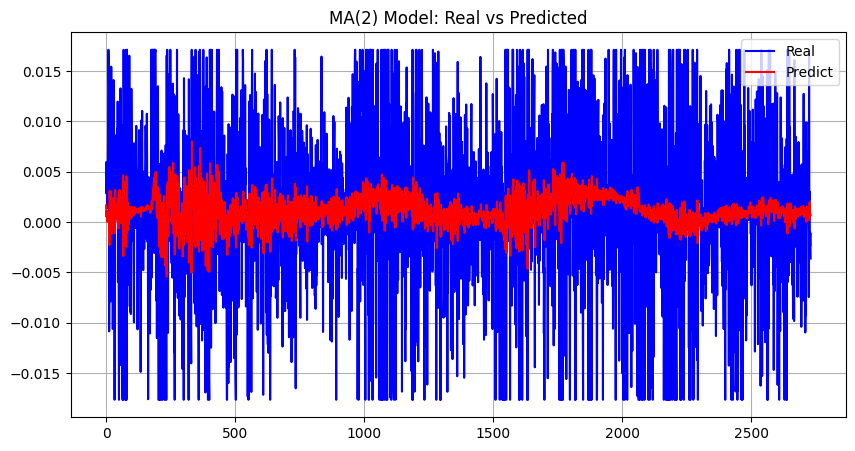

'vn30'

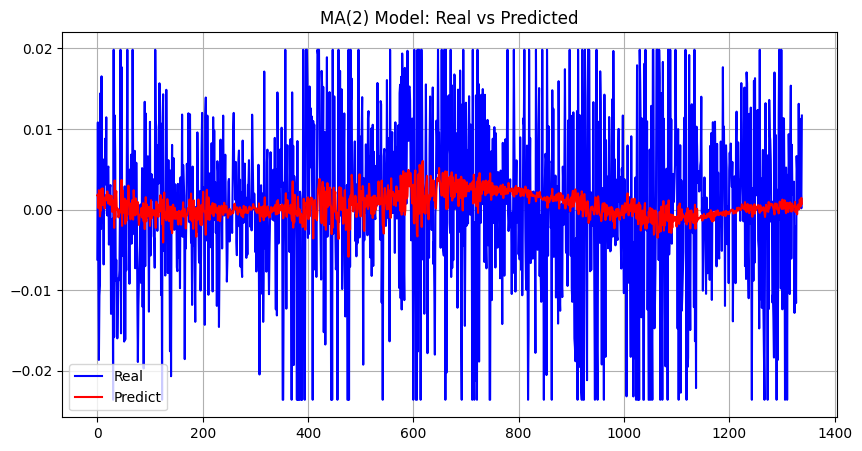

'vni'

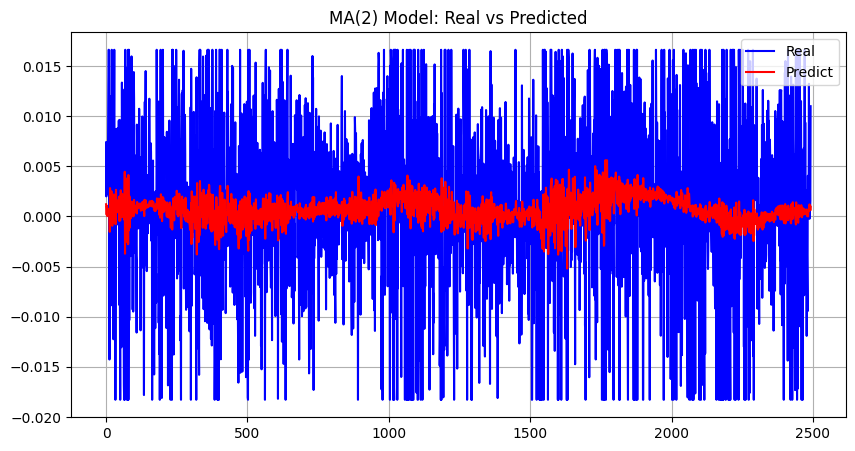

In [18]:
for i in market["exchange"].unique():
    if i in ["HSX", "vni", "vn30"]:
        i
        data = market_winsored[market_winsored["exchange"] == i]
        data.index = pd.date_range(
            start=data["time"].min(),
            periods=len(data),
            freq="B",
        )
        visualize_ma(
            np.asarray(data["return_weighted"]),
            2,
        )

* Both of AR and MA model give bad predictions, when we use more lag the shape of the red predict line might be more similar to real but the MSE and MAPE backtest value would be larger due to mis-match in the time.


## ARIMA model for model predicting

In [8]:
from arima import *

'HSX'

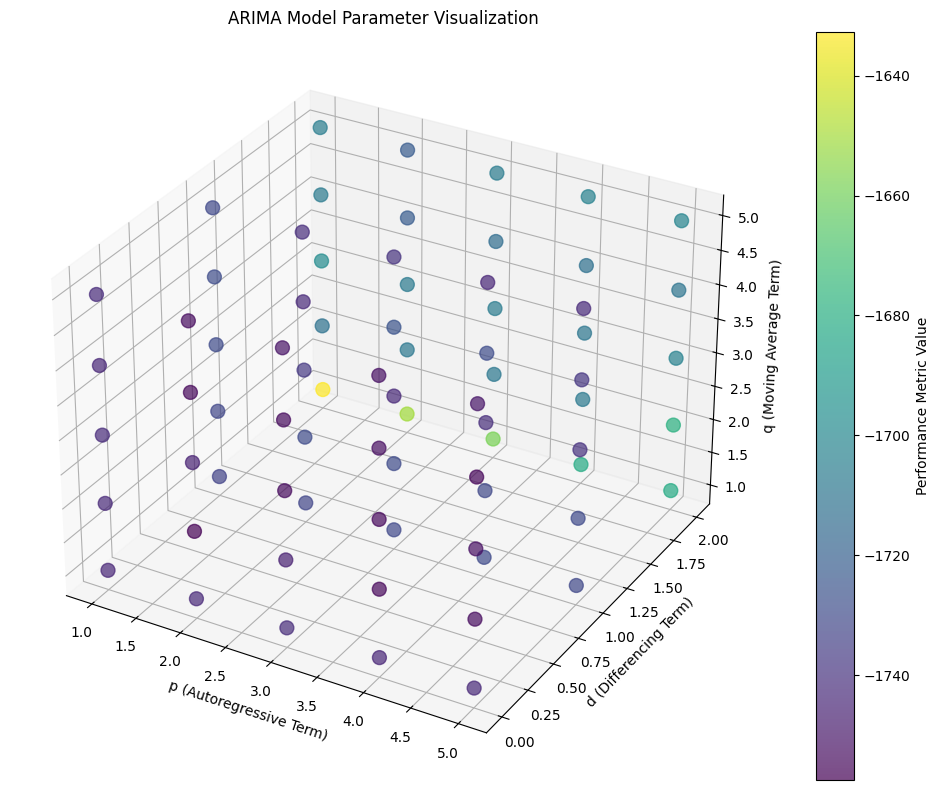

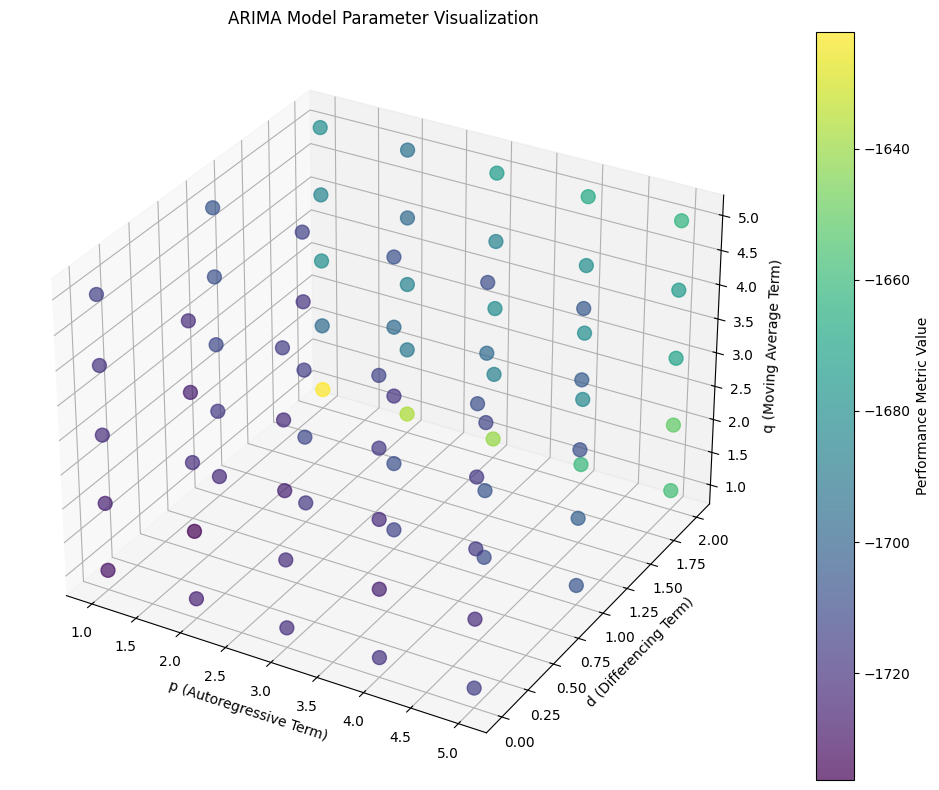

{'best_aic_order': ((2, 0, 2), np.float64(-1757.4830340060998)),
 'best_bic_order': ((2, 0, 2), np.float64(-1757.4830340060998))}

'vn30'

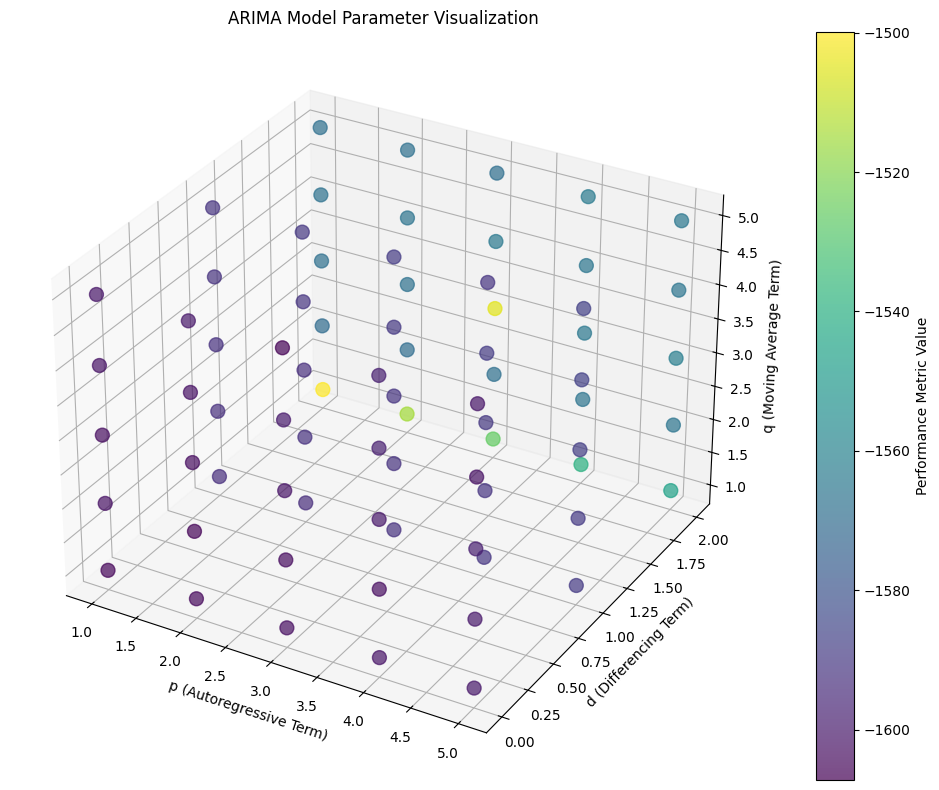

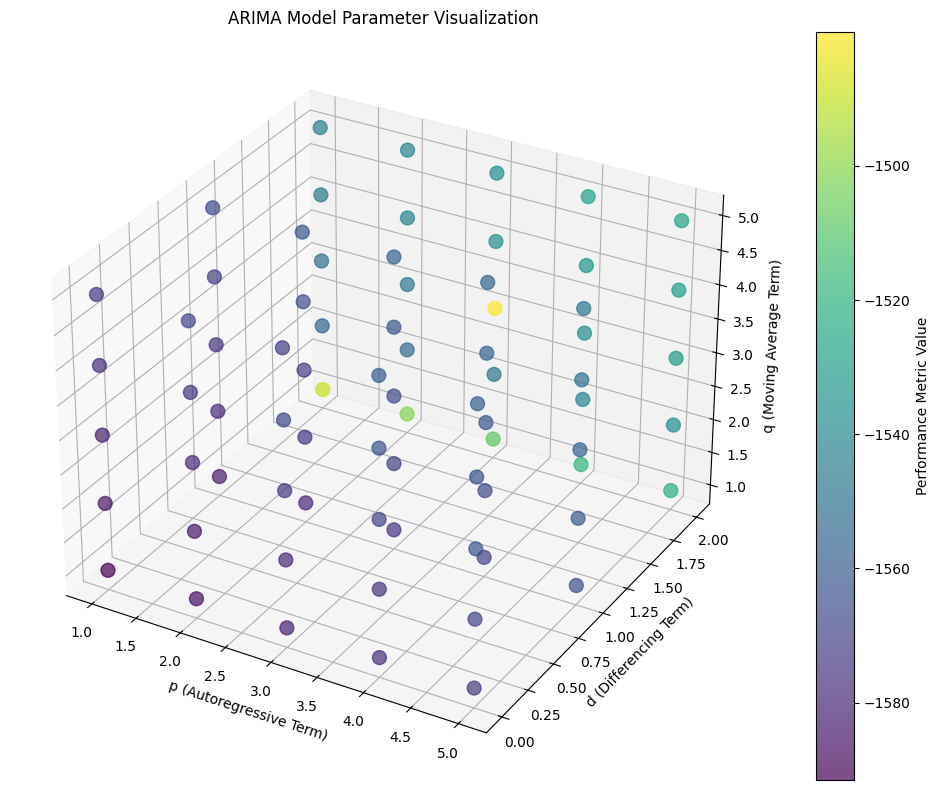

{'best_aic_order': ((3, 0, 5), np.float64(-1607.2276406533006)),
 'best_bic_order': ((3, 0, 5), np.float64(-1607.2276406533006))}

'vni'

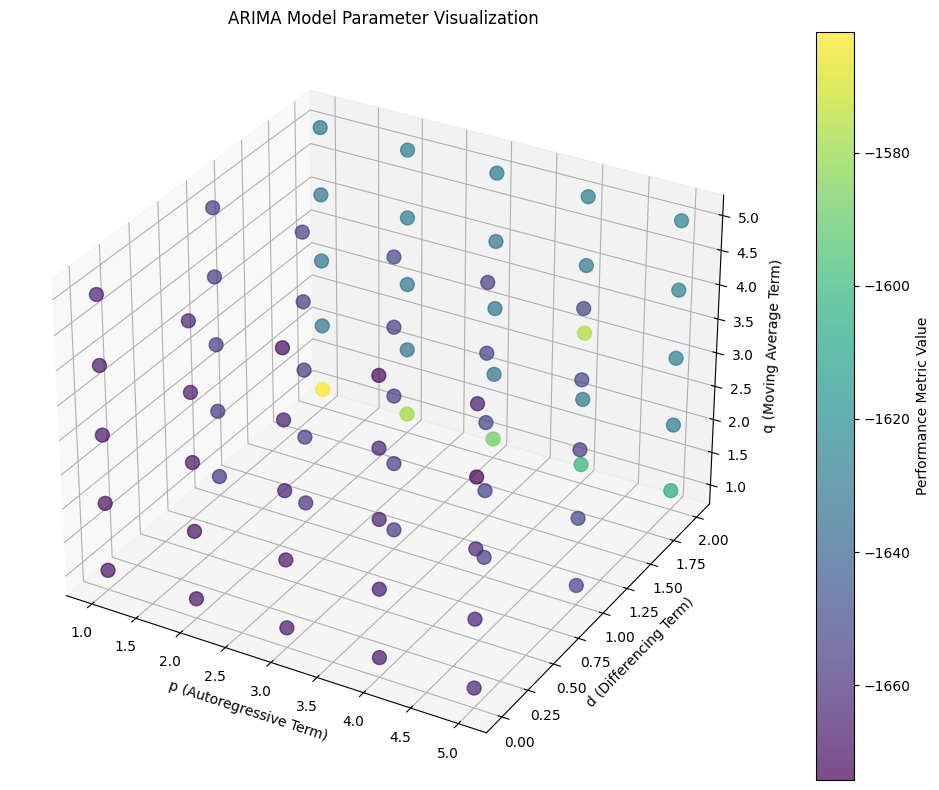

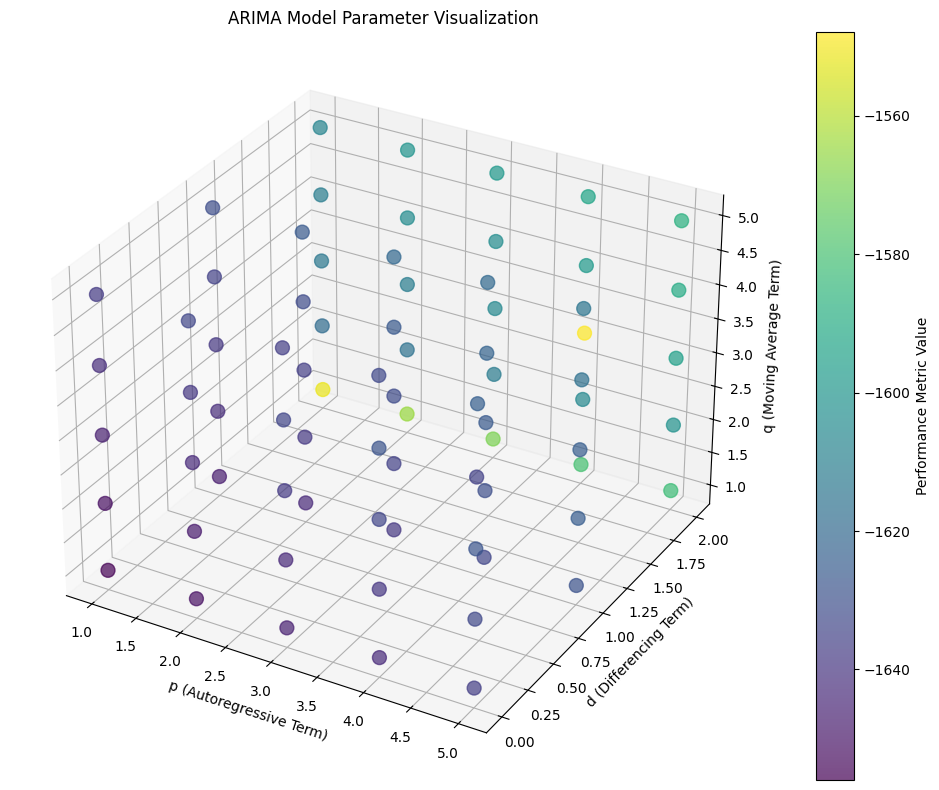

{'best_aic_order': ((5, 0, 4), np.float64(-1674.2073885539123)),
 'best_bic_order': ((5, 0, 4), np.float64(-1674.2073885539123))}

In [19]:


for i in market_winsored["exchange"].unique():
    if i in ["HSX", "vni", "vn30"]:
        i
        data = market_winsored[market_winsored["exchange"] == i]
        data.index = pd.date_range(
            start=data["time"].min(),
            periods=len(data),
            freq="B",
        )
        info_criteria_selection_arima(
            data["log_return_weighted"], [5, 2, 5]
        )

In [7]:
data = market_winsored[market_winsored["exchange"] == "HSX"]
data.index = pd.date_range(
    start=data["time"].min(),
    periods=len(data),
    freq="B",
)

'HSX'

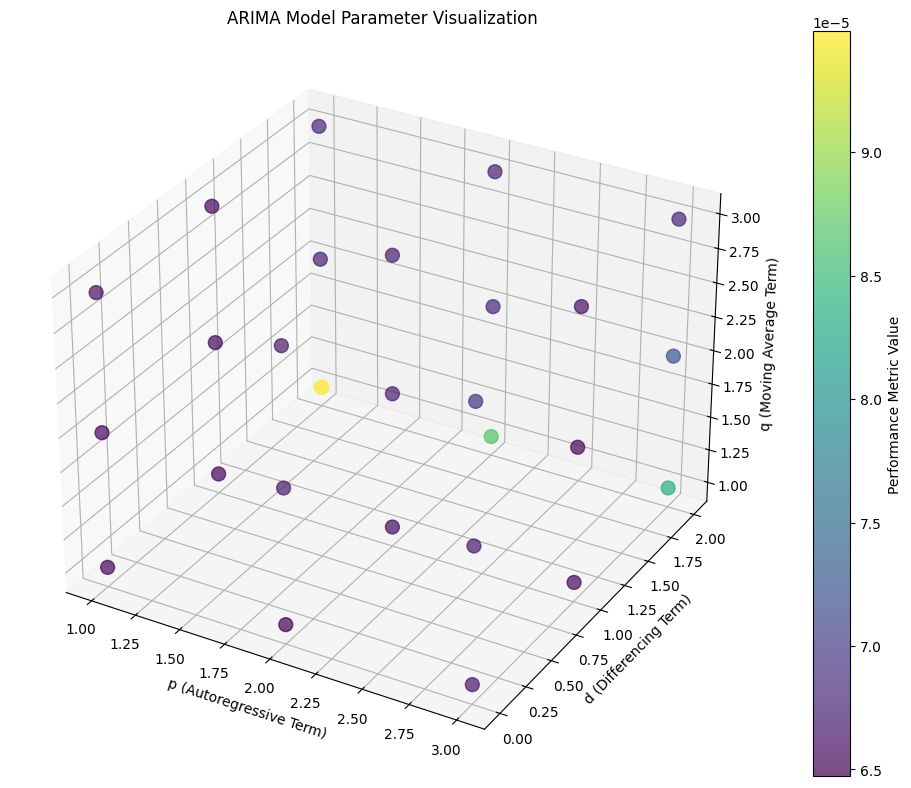

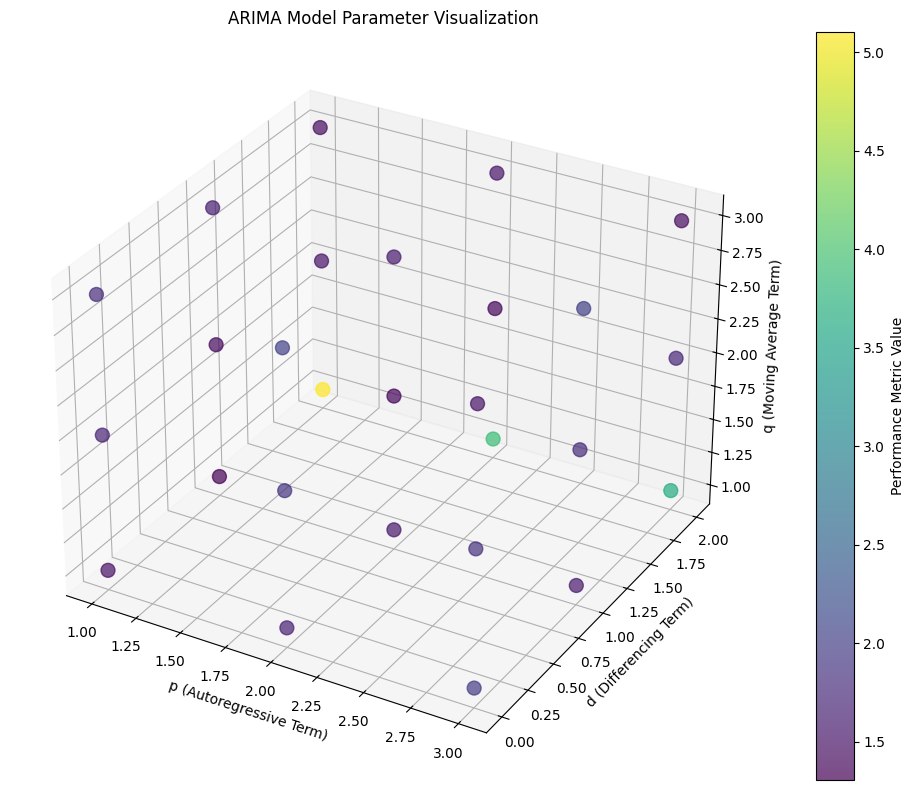

        mse      order
0  0.000065  (2, 0, 1)        mape      order
0  1.304771  (1, 1, 1)


mse      mape      order
0  0.000065  1.474611  (1, 0, 1)
0  0.000065  1.677987  (1, 0, 2)
0  0.000066  1.782679  (1, 0, 3)
0  0.000065  1.304771  (1, 1, 1)
0  0.000065  1.399628  (1, 1, 2)
0  0.000065  1.612278  (1, 1, 3)
0  0.000095  5.100463  (1, 2, 1)
0  0.000067  1.485024  (1, 2, 2)
0  0.000068  1.437527  (1, 2, 3)
0  0.000065  1.634748  (2, 0, 1)
0  0.000067  1.865281  (2, 0, 2)
0  0.000067  2.034755  (2, 0, 3)
0  0.000065  1.536096  (2, 1, 1)
0  0.000067  1.357382  (2, 1, 2)
0  0.000067  1.567323  (2, 1, 3)
0  0.000086  3.890562  (2, 2, 1)
0  0.000068  1.349624  (2, 2, 2)
0  0.000067  1.518865  (2, 2, 3)
0  0.000066  1.972832  (3, 0, 1)
0  0.000067  1.833737  (3, 0, 2)
0  0.000069  1.489966  (3, 0, 3)
0  0.000065  1.562409  (3, 1, 1)
0  0.000065  1.760285  (3, 1, 2)
0  0.000066  2.022015  (3, 1, 3)
0  0.000084  3.630848  (3, 2, 1)
0  0.000073  1.695887  (3, 2, 2)
0  0.000068  1.438165  (3, 2, 3)

'vni'

value error order(3, 1, 2), start_index:40, :292
value error order(3, 1, 2), start_index:51, :303
value error order(3, 1, 2), start_index:71, :323
value error order(3, 1, 2), start_index:211, :463
value error order(3, 1, 2), start_index:199, :451


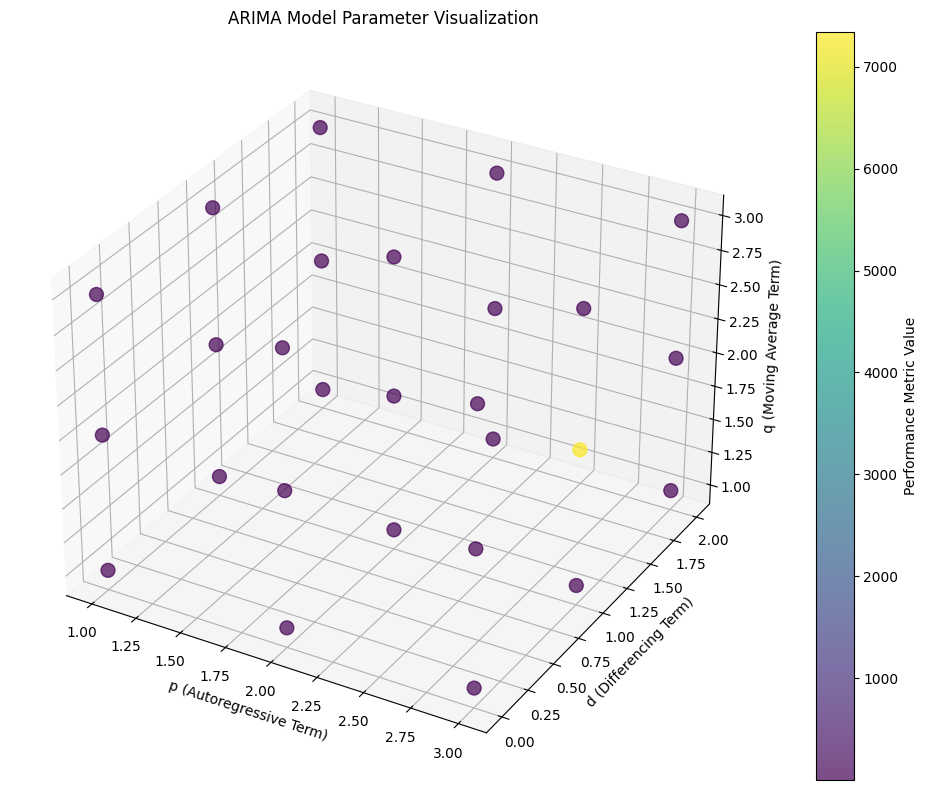

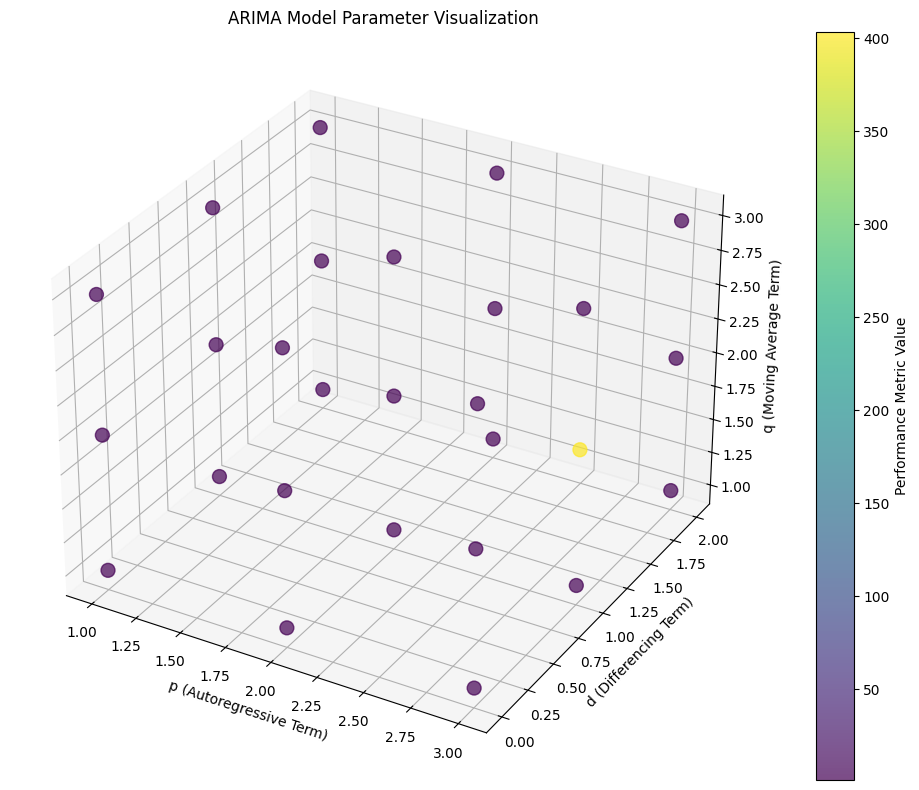

        mse      order
0  0.000087  (3, 1, 3)        mape      order
0  1.169516  (1, 1, 1)


mse        mape      order
0     0.000088    1.173648  (1, 0, 1)
0     0.000088    1.241225  (1, 0, 2)
0     0.000089    1.241037  (1, 0, 3)
0     0.000088    1.169516  (1, 1, 1)
0     0.000090    1.222624  (1, 1, 2)
0     0.000089    1.263712  (1, 1, 3)
0     0.000129    3.125498  (1, 2, 1)
0     0.000090    1.454658  (1, 2, 2)
0     0.000091    1.560594  (1, 2, 3)
0     0.000088    1.250643  (2, 0, 1)
0     0.000089    1.240680  (2, 0, 2)
0     0.000090    1.614690  (2, 0, 3)
0     0.000088    1.207530  (2, 1, 1)
0     0.000088    1.253848  (2, 1, 2)
0     0.000089    1.658199  (2, 1, 3)
0     0.000115    2.286539  (2, 2, 1)
0     0.000090    1.621402  (2, 2, 2)
0     0.000092    1.601457  (2, 2, 3)
0     0.000089    1.238669  (3, 0, 1)
0     0.000088    1.632601  (3, 0, 2)
0     0.000094    2.026220  (3, 0, 3)
0     0.000089    1.205975  (3, 1, 1)
0  7337.361495  403.146398  (3, 1, 2)
0     0.000087    1.782822  (3, 1, 3)
0     0.000111    2.537209  (3, 2, 1)
0     0.000091    1.624140  (3, 2, 2)
0     0.000091    1.763560  (3, 2, 3)

In [11]:
for i in market_winsored["exchange"].unique():
    if i in ["vni", "HSX"]:
        i
        data = market_winsored[market_winsored["exchange"] == i]
        data.index = pd.date_range(
            start=data["time"].min(),
            periods=len(data),
            freq="B",
        )
        plot_best_arima_model(
            data["return_weighted"][-550:], (3, 2, 3)
        )